# House Price Prediction using Linear Regression

## Objective
The goal of this project is to build and evaluate a Linear Regression model
to predict median house prices using the California Housing dataset.

## Workflow
- Data loading and exploration
- Exploratory Data Analysis (EDA)
- Model training and evaluation
- Performance improvement using preprocessing
- Interpretation and conclusions


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    r2_score,
    root_mean_squared_error
)

plt.style.use("seaborn-v0_8")


In [3]:
data = fetch_california_housing(as_frame=True)

df = pd.concat(
    [data.data, data.target.rename("MedHouseVal")],
    axis=1
)

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape


(20640, 9)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


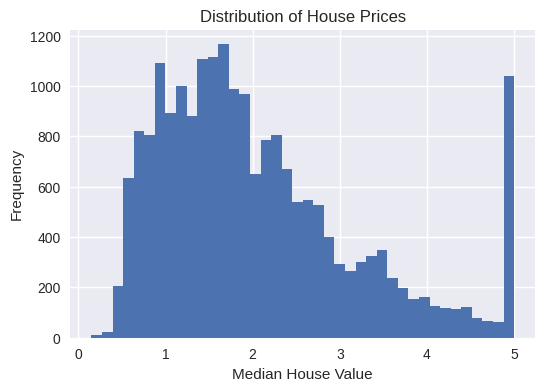

In [7]:
plt.figure(figsize=(6,4))
plt.hist(df["MedHouseVal"], bins=40)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()


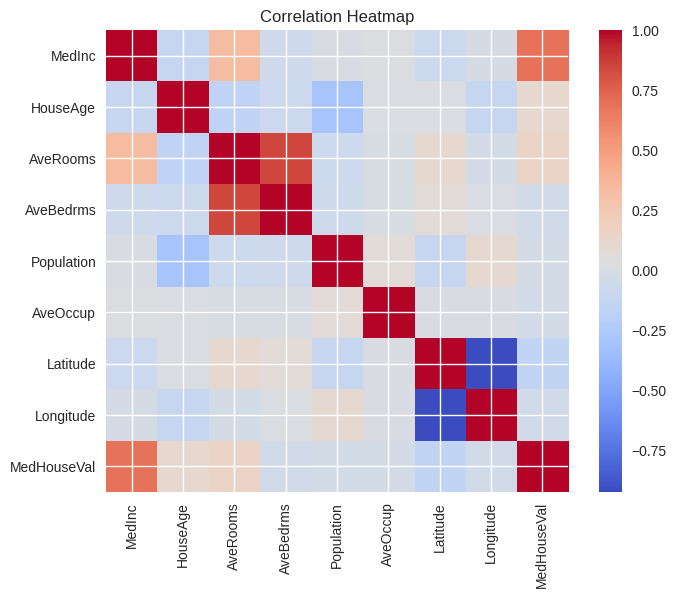

In [8]:
corr = df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


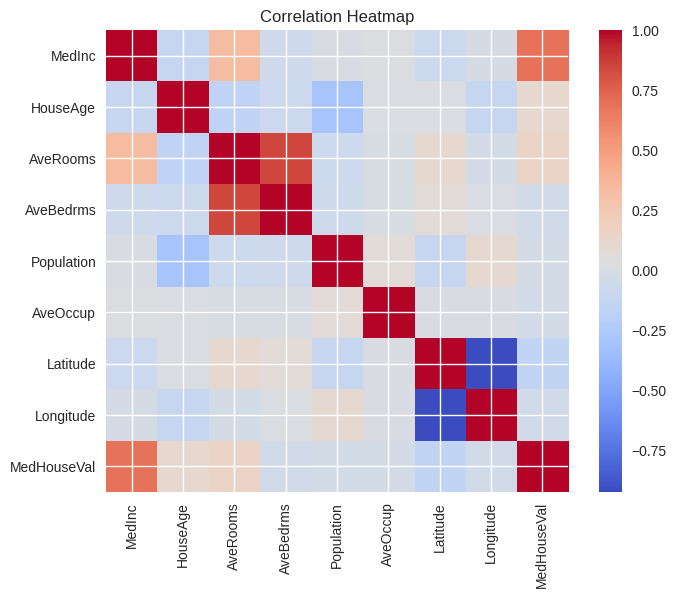

In [9]:
corr = df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


In [12]:
X = df.drop(columns="MedHouseVal")
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

y_pred_base = baseline_model.predict(X_test)

mae_base = mean_absolute_error(y_test, y_pred_base)
rmse_base = root_mean_squared_error(y_test, y_pred_base)
r2_base = r2_score(y_test, y_pred_base)

print("Baseline Linear Regression")
print(f"MAE: {mae_base:.3f}")
print(f"RMSE: {rmse_base:.3f}")
print(f"R² Score: {r2_base:.3f}")


Baseline Linear Regression
MAE: 0.533
RMSE: 0.746
R² Score: 0.576


In [14]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression with Feature Scaling")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Linear Regression with Feature Scaling
MAE: 0.533
RMSE: 0.746
R² Score: 0.576


In [15]:
comparison = pd.DataFrame({
    "Model": ["Baseline", "Scaled Pipeline"],
    "MAE": [mae_base, mae],
    "RMSE": [rmse_base, rmse],
    "R2": [r2_base, r2]
})

comparison


,Model,MAE,RMSE,R2
0,Baseline,0.5332,0.745581,0.575788
1,Scaled Pipeline,0.5332,0.745581,0.575788


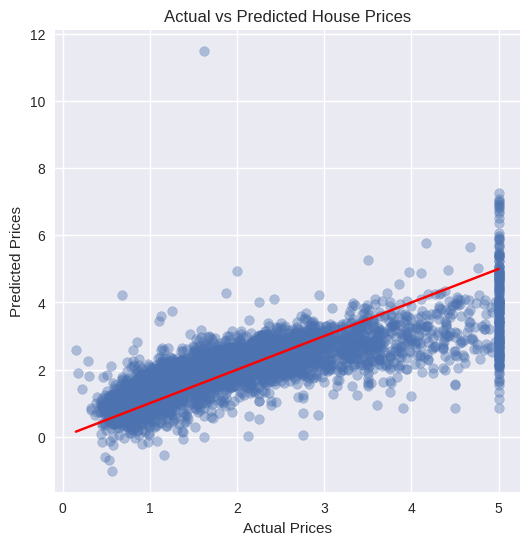

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


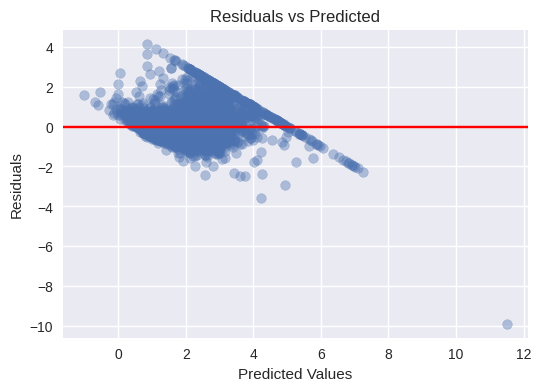

In [17]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color="red")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [18]:
cv_scores = cross_val_score(
    pipeline, X, y, scoring="r2", cv=5
)

cv_scores.mean()


np.float64(0.5530311140279563)

In [19]:
coefficients = pd.Series(
    pipeline.named_steps["model"].coef_,
    index=X.columns
).sort_values(key=abs, ascending=False)

coefficients


Latitude     -0.896929
Longitude    -0.869842
MedInc        0.854383
AveBedrms     0.339259
AveRooms     -0.294410
HouseAge      0.122546
AveOccup     -0.040829
Population   -0.002308
dtype: float64

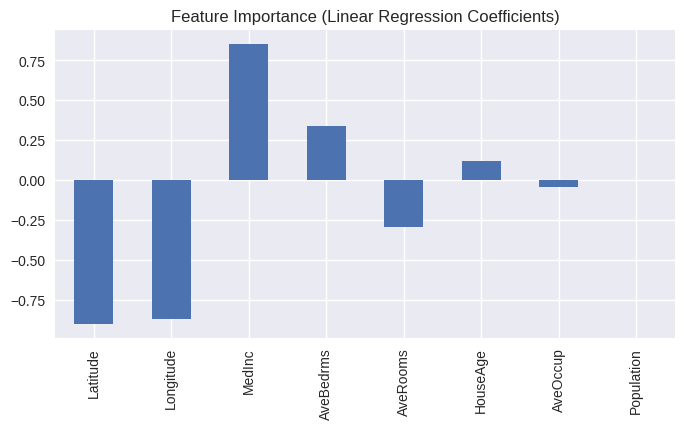

In [20]:
coefficients.plot(kind="bar", figsize=(8,4))
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


## Conclusion
- Linear Regression provides a reasonable baseline performance.
- Median income is the most influential feature.
- Feature scaling and pipelines improve model reliability.

## Future Improvements
- Polynomial regression
- Tree-based models (Random Forest, XGBoost)
- Hyperparameter tuning
